In [125]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
train=pd.read_csv('train_cab_fare.csv',na_values={"pickup_datetime":"43"})
test=pd.read_csv('test_cab_fare.csv')

In [4]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [5]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [6]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [8]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
train.shape

(16067, 7)

In [10]:
test.shape

(9914, 6)

In [11]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [13]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [14]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [15]:
train['fare_amount']=pd.to_numeric(train["fare_amount"],errors="coerce")

In [16]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [17]:
train.shape

(16067, 7)

In [18]:
train.dropna(subset = ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [19]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [20]:
train['year']=train['pickup_datetime'].dt.year
train['month']=train['pickup_datetime'].dt.month
train['Date']=train['pickup_datetime'].dt.day
train['Day']=train['pickup_datetime'].dt.dayofweek
train['Hour']=train['pickup_datetime'].dt.hour
train['Minute']=train['pickup_datetime'].dt.minute

In [21]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [22]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [23]:
test['year']=test['pickup_datetime'].dt.year
test['month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [24]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [25]:
train=train.drop(train[train['pickup_datetime'].isnull()].index,axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [26]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [27]:
train=train.drop(train[train['passenger_count']>6].index,axis=0)

In [28]:
train=train.drop(train[train['passenger_count']==0].index,axis=0)

In [29]:
train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [30]:
train['passenger_count'].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [31]:
train=train.drop(train[train['passenger_count'].isnull()].index,axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [32]:
train=train.drop(train[train['passenger_count']==0.12].index,axis=0)
train.shape

(15933, 13)

In [33]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [34]:
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [35]:
train=train.drop(train[train['fare_amount']<0].index,axis=0)
train.shape

(15930, 13)

In [36]:
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(15928, 13)

In [37]:
train=train.drop(train[train['fare_amount']>454].index,axis=0)
train.shape

(15926, 13)

In [38]:
train=train.drop(train[train['fare_amount'].isnull()].index,axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [39]:
train['fare_amount'].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
7918       2.50
8603       2.50
15490      2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [40]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [41]:
train[train["pickup_latitude"]<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [42]:
train[train["pickup_latitude"]>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [43]:
train=train.drop(train[train["pickup_latitude"]<-90].index,axis=0)
train=train.drop(train[train["pickup_latitude"]>90].index,axis=0)

In [44]:
print(train.shape)

(15901, 13)


In [45]:
train[train["pickup_longitude"]<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [46]:
train[train["pickup_longitude"]>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [47]:
train[train["dropoff_latitude"]<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [48]:
train[train["dropoff_latitude"]>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [49]:
train[train["dropoff_longitude"]<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [50]:
train[train["dropoff_longitude"]>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [51]:
train.shape

(15901, 13)

In [52]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [53]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [54]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    lon1, lat1, lon2, lat2=map(radians,[lon1, lat1, lon2, lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c=2*asin(sqrt(a))
    km=6371*c
    return km

In [55]:
train["distance"]=train[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(haversine,axis=1)

C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:7: 

In [56]:
test["distance"]=test[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(haversine,axis=1)

C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
C:\Users\vijay\AppData\Local\Temp\ipykernel_19444\4131309109.py:7: 

In [57]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [58]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [59]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [60]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [61]:
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [62]:
train=train.drop(train[train['distance']>130].index,axis=0)
train.shape

(15878, 14)

In [63]:
Counter(train["distance"]==0)

Counter({False: 15424, True: 454})

In [64]:
Counter(test["distance"]==0)

Counter({False: 9829, True: 85})

In [65]:
train=train.drop(train[train['distance']==0].index,axis=0)
train.shape

(15424, 14)

In [66]:
test=test.drop(test[test['distance']==0].index,axis=0)
test.shape

(9829, 13)

In [67]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,10.9,2009-05-20 18:56:42,-73.994191,40.751138,-73.962769,40.769719,1.0,2009.0,5.0,20.0,2.0,18.0,56.0,3.357490
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0,0.850044
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0,7.867638
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0,1.469105


In [68]:
drop_coloumns=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
train=train.drop(drop_coloumns,axis=1)

In [69]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [70]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [71]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
distance                    float64
dtype: object

In [72]:
drop_coloumns=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
test=test.drop(drop_coloumns,axis=1)

In [73]:
test.dtypes

passenger_count      int64
year                 int32
month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [74]:
train['passenger_count']=train['passenger_count'].astype('int64')
train['year']=train['year'].astype('int64')
train['month']=train['month'].astype('int64')
train['Date']=train['Date'].astype('int64')
train['Day']=train['Day'].astype('int64')
train['Hour']=train['Hour'].astype('int64')

In [75]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [76]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


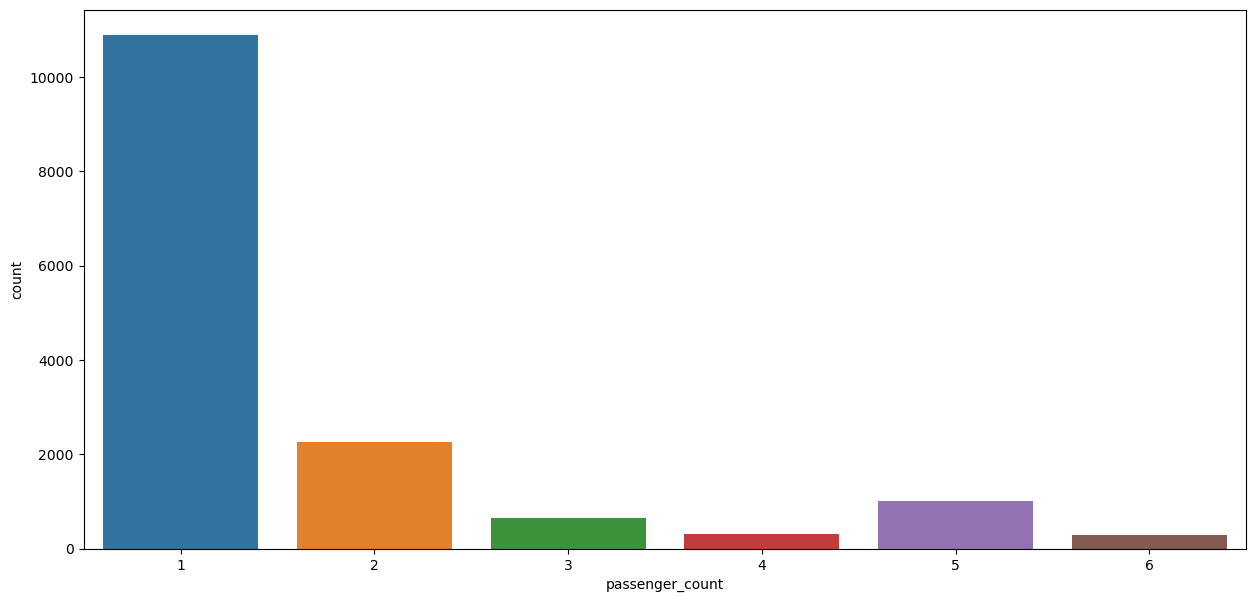

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count",data=train)
plt.show()

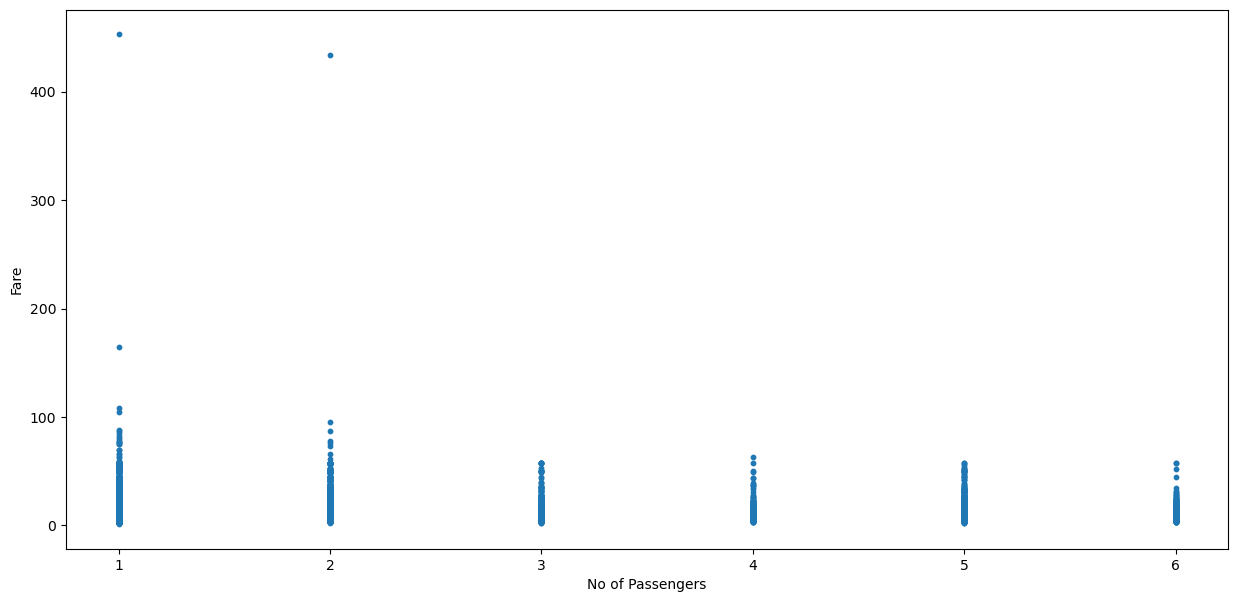

In [78]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["passenger_count"],y=train['fare_amount'],s=10)
plt.xlabel("No of Passengers")
plt.ylabel('Fare')
plt.show()

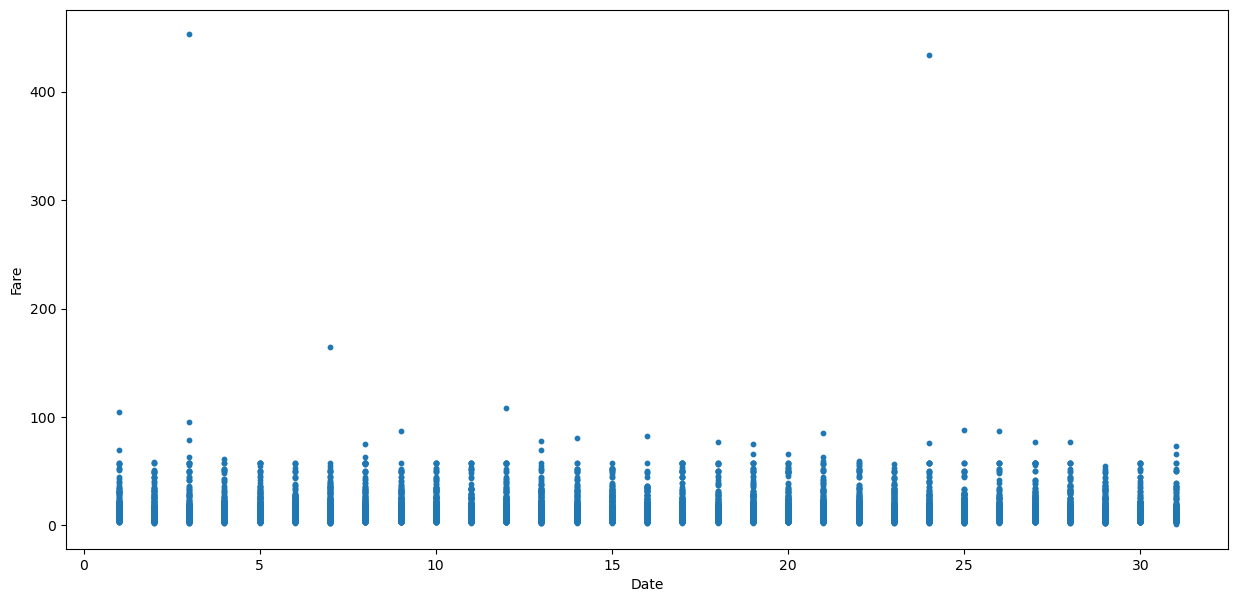

In [79]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["Date"],y=train['fare_amount'],s=10)
plt.xlabel("Date")
plt.ylabel('Fare')
plt.show()

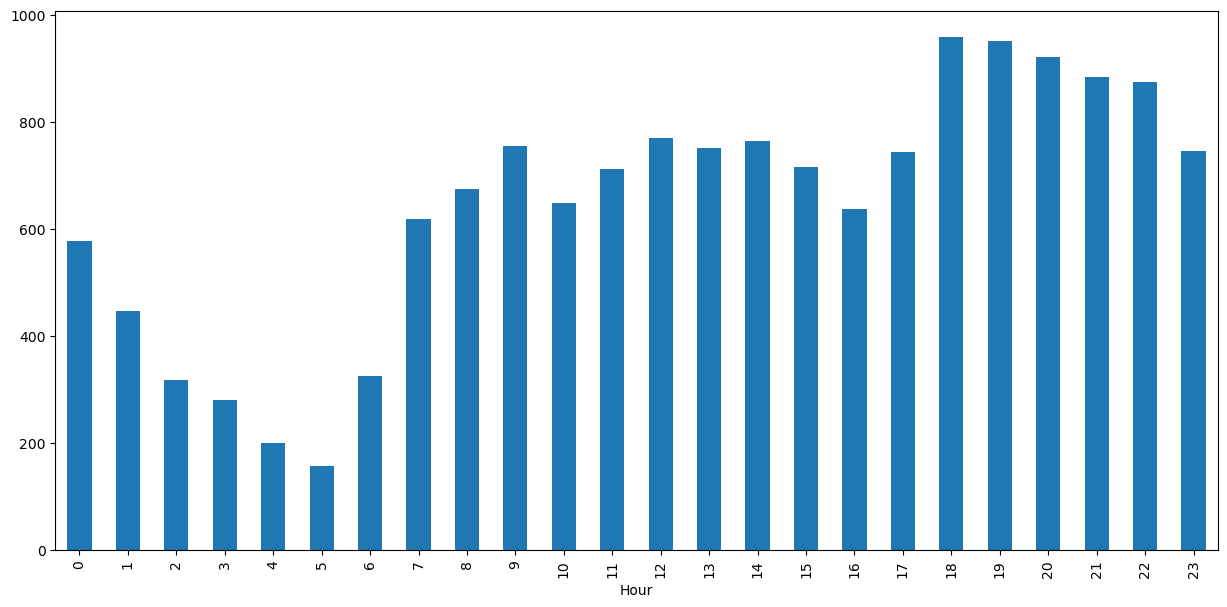

In [80]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind='bar')
plt.show()

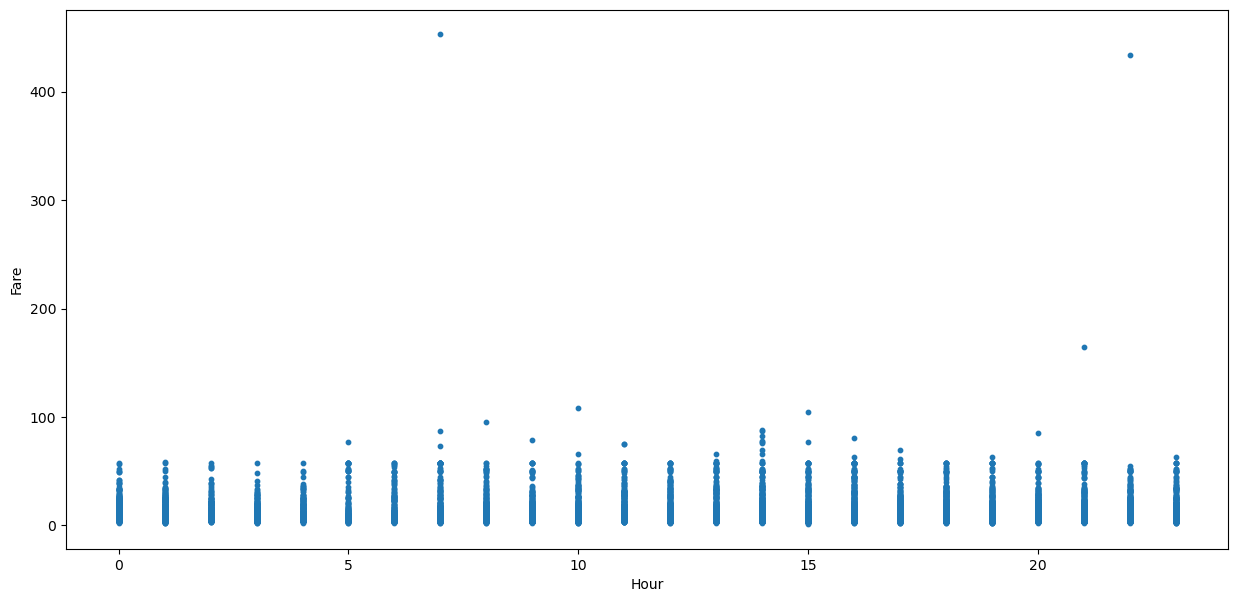

In [81]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["Hour"],y=train['fare_amount'],s=10)
plt.xlabel("Hour")
plt.ylabel('Fare')
plt.show()

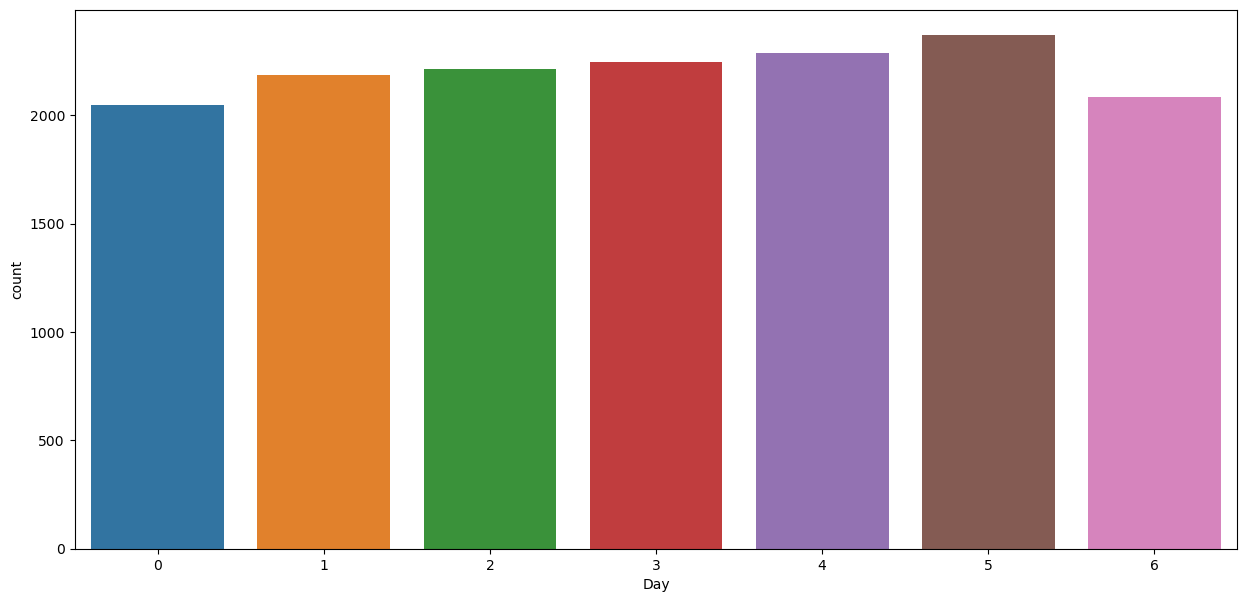

In [82]:
plt.figure(figsize=(15,7))
sns.countplot(x='Day',data=train)
plt.show()

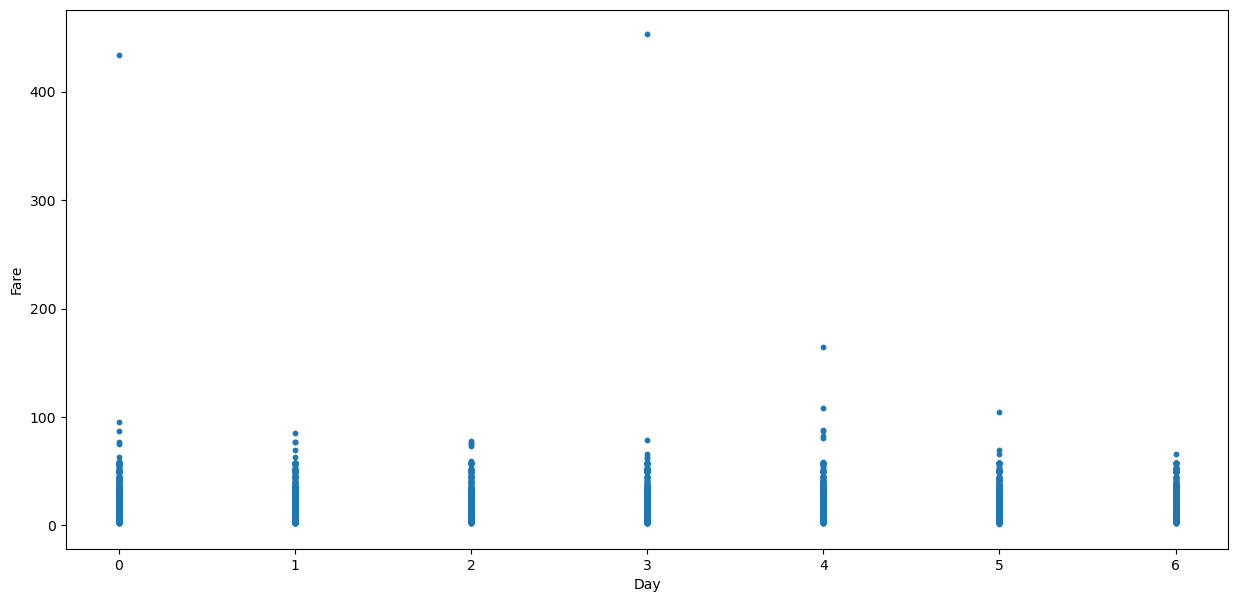

In [83]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["Day"],y=train['fare_amount'],s=10)
plt.xlabel("Day")
plt.ylabel('Fare')
plt.show()

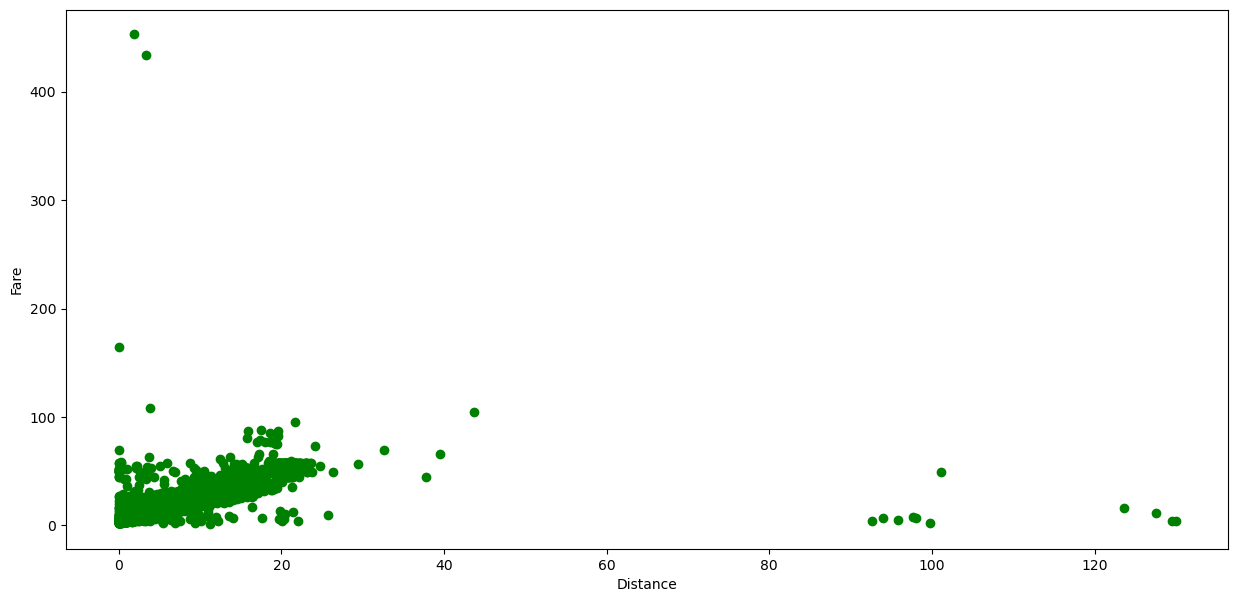

In [84]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["distance"],y=train['fare_amount'],c='g')
plt.xlabel("Distance")
plt.ylabel('Fare')
plt.show()

fare_amount


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


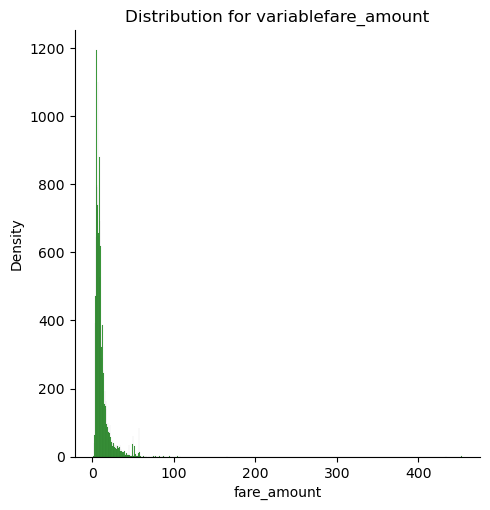

distance


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


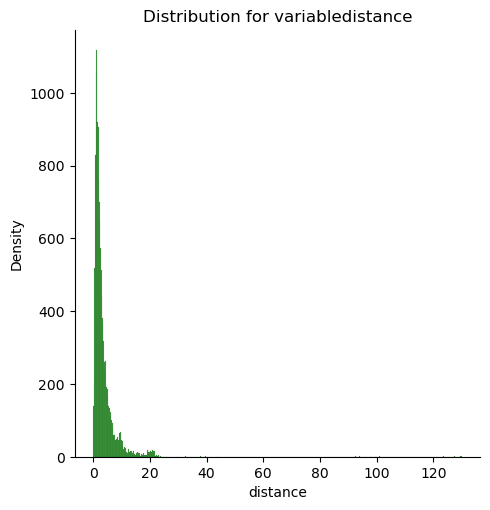

In [85]:
for i in ['fare_amount','distance']:
    print(i)
    sns.displot(train[i],bins="auto",color="green")
    plt.title("Distribution for variable" + i)
    plt.ylabel('Density')
    plt.show()

In [86]:
train['fare_amount']=np.log1p(train['fare_amount'])
train['distance']=np.log1p(train['distance'])

fare_amount


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


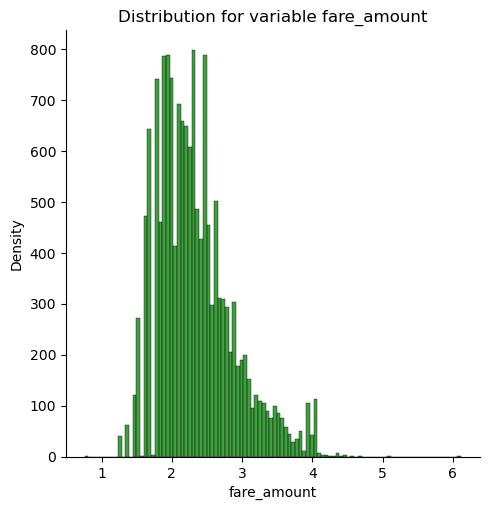

distance


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


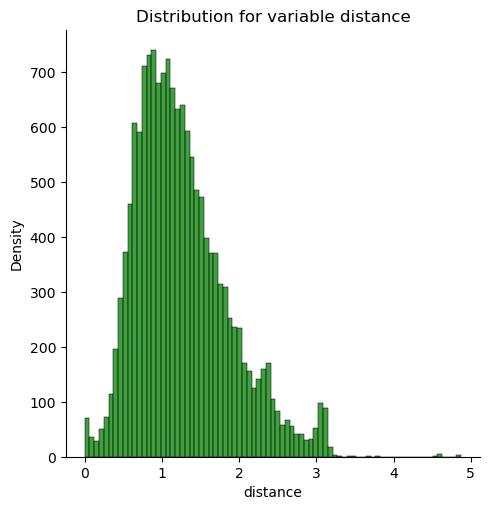

In [87]:
for i in ['fare_amount','distance']:
    print(i)
    sns.displot(train[i],bins="auto",color="green")
    plt.title("Distribution for variable " + i)
    plt.ylabel('Density')
    plt.show()

distance


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


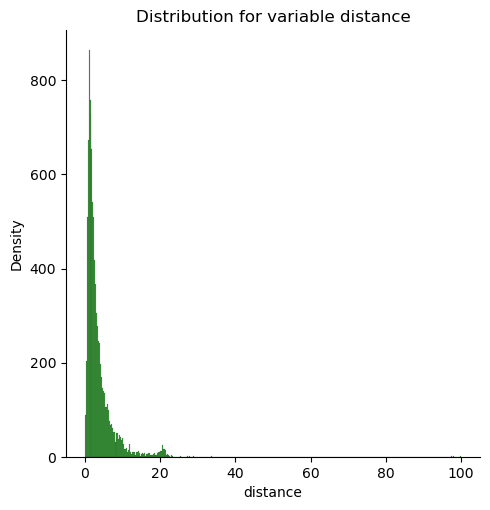

In [88]:
for i in ['distance']:
    print(i)
    sns.displot(test[i],bins="auto",color="green")
    plt.title("Distribution for variable " + i)
    plt.ylabel('Density')
    plt.show()

In [89]:
test['distance']=np.log1p(test['distance'])

distance


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


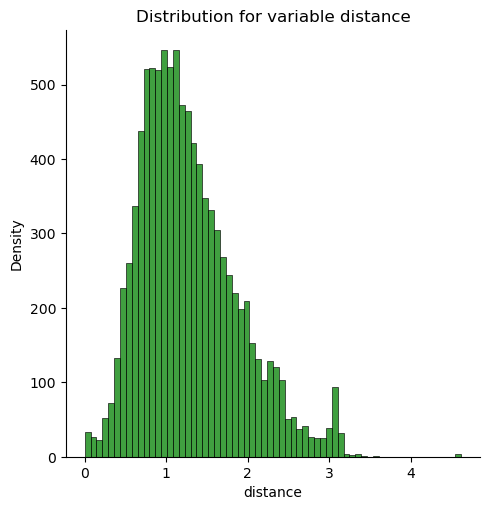

In [90]:
for i in ['distance']:
    print(i)
    sns.displot(test[i],bins="auto",color="green")
    plt.title("Distribution for variable " + i)
    plt.ylabel('Density')
    plt.show()

In [91]:
x_train,x_test,y_train,y_test=train_test_split(train.iloc[:,train.columns!='fare_amount'],train.iloc[:,0],test_size=0.2,random_state=1)

In [92]:
x_train

,passenger_count,year,month,Date,Day,Hour,distance
7690,2,2012,5,16,2,6,1.691253
13018,1,2014,7,11,4,10,0.828231
12950,3,2009,6,27,5,17,0.980620
14009,1,2009,6,12,4,15,0.534072
2816,5,2013,5,18,5,20,1.141300
...,...,...,...,...,...,...,...
994,1,2009,3,24,1,11,1.465260
5454,1,2014,1,11,5,18,0.666875
12682,6,2014,1,7,1,9,1.437090
259,1,2013,5,2,3,3,0.803939


In [93]:
y_train

7690     2.370244
13018    2.014903
12950    2.014903
14009    1.629241
2816     2.890372
           ...   
994      2.687847
5454     1.704748
12682    2.917771
259      1.945910
13919    3.462606
Name: fare_amount, Length: 12339, dtype: float64

In [94]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


In [95]:
print(y_train.shape)
print(y_test.shape)

(12339,)
(3085,)


In [96]:
 fit_LR=LinearRegression().fit(x_train,y_train)

In [97]:
pred_train_LR=fit_LR.predict(x_train)

In [98]:
pred_test_LR= fit_LR.predict(x_test)

In [100]:
RMSE_test_LR=np.sqrt(mean_squared_error(y_test,pred_test_LR))
RMSE_train_LR=np.sqrt(mean_squared_error(y_train,pred_train_LR))

In [101]:
print("The Root mean squared error for Train data = " +str(RMSE_train_LR))
print("The Root mean squared error for Test data = " +str(RMSE_test_LR))

The Root mean squared error for Train data = 0.2753110017967311
The Root mean squared error for Test data = 0.24540661786977663


In [102]:
from sklearn.metrics import r2_score
r2_score(y_train,pred_train_LR)

0.749550265188041

In [103]:
r2_score(y_test,pred_test_LR)

0.7827019104296612

In [104]:
fit_DT=DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)

In [105]:
pred_train_DT=fit_DT.predict(x_train)
pred_test_DT= fit_DT.predict(x_test)

In [106]:
RMSE_test_DT=np.sqrt(mean_squared_error(y_test,pred_test_DT))
RMSE_train_DT=np.sqrt(mean_squared_error(y_train,pred_train_DT))

In [107]:
print("The Root mean squared error for Train data = " +str(RMSE_train_DT))
print("The Root mean squared error for Test data = " +str(RMSE_test_DT))

The Root mean squared error for Train data = 0.2996210902077019
The Root mean squared error for Test data = 0.2867460617158618


In [108]:
r2_score(y_train,pred_train_DT)

0.7033678616157003

In [109]:
r2_score(y_test,pred_test_DT)

0.7033268167661031

In [112]:
fit_RF=RandomForestRegressor(n_estimators=200).fit(x_train,y_train)

In [113]:
pred_train_RF=fit_RF.predict(x_train)
pred_test_RF= fit_RF.predict(x_test)

In [114]:
RMSE_test_RF=np.sqrt(mean_squared_error(y_test,pred_test_RF))
RMSE_train_RF=np.sqrt(mean_squared_error(y_train,pred_train_RF))

In [115]:
print("The Root mean squared error for Train data = " +str(RMSE_train_RF))
print("The Root mean squared error for Test data = " +str(RMSE_test_RF))

The Root mean squared error for Train data = 0.09525624755374834
The Root mean squared error for Test data = 0.23473133127156093


In [116]:
r2_score(y_train,pred_train_RF)

0.9700180150889218

In [117]:
r2_score(y_test,pred_test_RF)

0.8011958291343386

In [118]:
fit_GB=GradientBoostingRegressor().fit(x_train,y_train)

In [119]:
pred_train_GB=fit_GB.predict(x_train)
pred_test_GB= fit_GB.predict(x_test)

In [120]:
RMSE_test_GB=np.sqrt(mean_squared_error(y_test,pred_test_GB))
RMSE_train_GB=np.sqrt(mean_squared_error(y_train,pred_train_GB))

In [121]:
print("The Root mean squared error for Train data = " +str(RMSE_train_GB))
print("The Root mean squared error for Test data = " +str(RMSE_test_GB))

The Root mean squared error for Train data = 0.22754316149645537
The Root mean squared error for Test data = 0.22754811157605023


In [122]:
r2_score(y_train,pred_train_GB)

0.8289193000175024

In [123]:
r2_score(y_test,pred_test_GB)

0.8131772161950277

In [124]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
from pprint import pprint
print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [138]:
RRF=RandomForestRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))
rand_grid={'n_estimators':n_estimator,
           'max_depth':depth}
randomcv_rf=RandomizedSearchCV(RRF,param_distributions=rand_grid,n_iter=5,cv=5,random_state=0)
randomcv_RF=randomcv_rf.fit(x_train,y_train)
predictions_RRF=randomcv_RF.predict(x_test)
view_best_params_RRF=randomcv_RF.best_params_
best_model=randomcv_RF.best_estimator_
predictions_RRF=best_model.predict(x_test)
RRF_r2=r2_score(y_test,predictions_RRF)
RRF_rmse=np.sqrt(mean_squared_error(y_test,predictions_RRF))
print("Random Search CV Random Forest Regressor Model Performance")
print("Best Parameters=",view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ', RRF_rmse)

Random Search CV Random Forest Regressor Model Performance
Best Parameters= {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.2373410611350033


In [131]:
gb=GradientBoostingRegressor(random_state=42)
from pprint import pprint
print("Parameters currently in use:\n")
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [137]:
gb=GradientBoostingRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))
rand_grid={'n_estimators':n_estimator,
           'max_depth':depth}
randomcv_gb=RandomizedSearchCV(gb,param_distributions=rand_grid,n_iter=5,cv=5,random_state=0)
randomcv_GB=randomcv_gb.fit(x_train,y_train)
predictions_GB=randomcv_GB.predict(x_test)
view_best_params_GB=randomcv_GB.best_params_
best_model=randomcv_GB.best_estimator_
predictions_GB=best_model.predict(x_test)
GB_r2=r2_score(y_test,predictions_GB)
GB_rmse=np.sqrt(mean_squared_error(y_test,predictions_GB))
print("Random Search CV Gradient Boosting Model Performance")
print("Best Parameters=",view_best_params_GB)
print('R-squared = {:0.2}.'.format(GB_r2))
print('RMSE = ', GB_rmse)

Random Search CV Gradient Boosting Model Performance
Best Parameters= {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25226513358657066


In [135]:
GRF=RandomForestRegressor(random_state=0)
n_estimator=list(range(11,20,1))
depth=list(range(5,15,2))
grid_search={'n_estimators':n_estimator,
           'max_depth':depth}
gridcv_rf=GridSearchCV(GRF,param_grid=grid_search,cv=5)
gridcv_RF=gridcv_rf.fit(x_train,y_train)
predictions_GRF=gridcv_RF.predict(x_test)
view_best_params_GRF=gridcv_RF.best_params_
best_model=gridcv_RF.best_estimator_
predictions_GRF=best_model.predict(x_test)
GRF_r2=r2_score(y_test,predictions_GRF)
GRF_rmse=np.sqrt(mean_squared_error(y_test,predictions_GRF))
print("Grid Search CV Random Forest Regressor Model Performance")
print("Best Parameters=",view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ', GRF_rmse)

Grid Search CV Random Forest Regressor Model Performance
Best Parameters= {'max_depth': 7, 'n_estimators': 15}
R-squared = 0.8.
RMSE =  0.23711854543717428


In [136]:
GGB=GradientBoostingRegressor(random_state=0)
n_estimator=list(range(11,20,1))
depth=list(range(5,15,2))
grid_search={'n_estimators':n_estimator,
           'max_depth':depth}
gridcv_gb=GridSearchCV(GGB,param_grid=grid_search,cv=5)
gridcv_GB=gridcv_gb.fit(x_train,y_train)
predictions_GGB=gridcv_GB.predict(x_test)
view_best_params_GGB=gridcv_GB.best_params_
best_model=gridcv_GB.best_estimator_
predictions_GGB=best_model.predict(x_test)
GGB_r2=r2_score(y_test,predictions_GGB)
GGB_rmse=np.sqrt(mean_squared_error(y_test,predictions_GGB))
print("Grid Search CV Gradient Boosting Model Performance")
print("Best Parameters=",view_best_params_GGB)
print('R-squared = {:0.2}.'.format(GGB_r2))
print('RMSE = ', GGB_rmse)

Grid Search CV Gradient Boosting Model Performance
Best Parameters= {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.23724212611002213


In [140]:
regr=RandomForestRegressor(random_state=0)
n_estimator=list(range(11,20,1))
depth=list(range(5,15,2))
grid_search={'n_estimators':n_estimator,
             'max_depth':depth}
gridcv_rf=GridSearchCV(regr,param_grid=grid_search,cv=5)
gridcv_RF=gridcv_rf.fit(x_train,y_train)
view_best_params_GRF=gridcv_RF.best_params_
predictions_GRF_test=gridcv_RF.predict(test)

In [141]:
predictions_GRF_test

array([2.37543359, 2.39413478, 1.68070503, ..., 4.00620024, 3.30834716,
       2.04017073])

In [142]:
test['predicted_fare']=predictions_GRF_test

In [144]:
test.head()

,passenger_count,year,month,Date,Day,Hour,distance,predicted_fare
0,1,2015,1,27,1,13,1.200946,2.375434
1,1,2015,1,27,1,13,1.231205,2.394135
2,1,2011,10,8,5,11,0.481579,1.680705
3,1,2012,12,1,5,21,1.085538,2.218272
4,1,2012,12,1,5,21,1.854312,2.786595


In [145]:
test.to_csv('test.csv')